In [ ]:
pip install emoji

     |████████████████████████████████| 133kB 5.4MB/s 


In [ ]:
#importing necessary libraries
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [ ]:
# funtion to capture date and time

def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
startsWithDateAndTime('7/26/18, 22:51 - Bobby: This message was deleted')

True

In [ ]:
# function to find the sender of  message 
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [ ]:
# function to split date message time and author


def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
# uploading data set chat  downloaded from whatsapp

from google.colab import files
uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'runways.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Saving runways.txt to runways.txt


In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)
df1=df.copy()

In [ ]:
# checking the members in the group
df.Author.unique()

array(['Priyanshu Com Class', 'Millan', None, 'Pragna', 'Sahana Gowda',
       'Prem Kumar'], dtype=object)

In [ ]:
# droping the null values
# and separating the media content in the chat
df = df.dropna()
df.info()
total_messages = df.shape[0]
print(total_messages)
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8114 entries, 0 to 8269
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8114 non-null   datetime64[ns]
 1   Time     8114 non-null   object        
 2   Author   8114 non-null   object        
 3   Message  8114 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 317.0+ KB
8114
3107


In [ ]:
# collecting all the emojis in the group chat and storing in a list
import re
import emoji
r=[]

def extract_emojis(text):
    return re.findall(emoji.get_emoji_regexp(), text)
    

for i in df['Message']:

  r.append(extract_emojis(i))
 



In [ ]:
# for message in df['Message']:
#     counter = split_count(message)
#     np.array(list_arrays).shape

In [ ]:
#  checking the count of total emojis
len(r)
print(r)
str(r)


[['🔥', '🔥'], [], ['🤦🏻\u200d♂️'], [], [], [], ['🤞', '🤞', '🤞'], [], ['🙌', '🙌', '🙌', '🙌'], [], [], [], ['🎉', '🎉', '🎉', '🎉'], ['😎'], [], [], [], [], [], [], [], [], [], [], ['🤭'], [], [], [], [], [], [], [], [], [], [], [], [], ['😅'], ['🤭', '🤭', '🤭'], [], ['😝', '😝'], [], ['🤣', '🤣', '🤣', '🤣'], [], ['🤩'], [], [], ['🔥'], ['🤯', '🤯', '🤯'], [], [], [], [], [], [], [], ['🔥'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['😍'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['😕'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

"[['🔥', '🔥'], [], ['🤦🏻\\u200d♂️'], [], [], [], ['🤞', '🤞', '🤞'], [], ['🙌', '🙌', '🙌', '🙌'], [], [], [], ['🎉', '🎉', '🎉', '🎉'], ['😎'], [], [], [], [], [], [], [], [], [], [], ['🤭'], [], [], [], [], [], [], [], [], [], [], [], [], ['😅'], ['🤭', '🤭', '🤭'], [], ['😝', '😝'], [], ['🤣', '🤣', '🤣', '🤣'], [], ['🤩'], [], [], ['🔥'], ['🤯', '🤯', '🤯'], [], [], [], [], [], [], [], ['🔥'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['😍'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['😕'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 

In [ ]:
# collecting all the urls or links in the group chat

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

In [ ]:
# total messages ,media,emojis,and links
# note emojis and messages are same because i still need to separate them
print("Data science Community")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",len(pp))
print("Links:",links)

Data science Community
Messages: 8114
Media: 3107
Emojis: 8114
Links: 2


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1
messages_df.tail(20)
messages_df1=messages_df.copy()
messages_df2=messages_df.copy()

In [ ]:
# final dataframe of all columns in the groupchat
messages_df


,Date,Time,Author,Message,urlcount,Letter_Count,Word_Count,MessageCount
0,2021-04-14,10:51 pm,Priyanshu Com Class,Is anyone watching? 🔥🔥,0,22,4,1
1,2021-04-14,10:59 pm,Millan,Me,0,2,1,1
2,2021-04-14,10:59 pm,Millan,Wat a match da🤦🏻‍♂️,0,19,4,1
3,2021-04-14,10:59 pm,Priyanshu Com Class,Yeaa bro,0,8,2,1
4,2021-04-14,10:59 pm,Priyanshu Com Class,My heart beat is like,0,21,5,1
...,...,...,...,...,...,...,...,...
8261,2021-11-06,8:23 pm,Millan,This message was deleted,0,24,4,1
8265,2021-11-06,8:39 pm,Priyanshu Com Class,🔥🔥🔥 guju nu pria kahana che,0,27,6,1
8266,2021-11-06,8:40 pm,Priyanshu Com Class,It's in Gujarati 🤭,0,18,4,1
8267,2021-11-06,9:34 pm,Pragna,I've never seen this b4😍,0,24,5,1


In [ ]:
# storing emojis in variable pp
pp=r.copy()
# df["emoji"] = df["Message"].apply(split_count)

In [ ]:
# storing emojis in a dataframe
df['new_col'] = np.array(pp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
df

,Date,Time,Author,Message,urlcount,emoji,new_col
0,2021-04-14,10:51 pm,Priyanshu Com Class,Is anyone watching? 🔥🔥,0,[],"[🔥, 🔥]"
1,2021-04-14,10:59 pm,Millan,Me,0,[],[]
2,2021-04-14,10:59 pm,Millan,Wat a match da🤦🏻‍♂️,0,[],[🤦🏻‍♂️]
3,2021-04-14,10:59 pm,Priyanshu Com Class,Yeaa bro,0,[],[]
4,2021-04-14,10:59 pm,Priyanshu Com Class,My heart beat is like,0,[],[]
...,...,...,...,...,...,...,...
8264,2021-11-06,8:39 pm,Sahana Gowda,<Media omitted>,0,[],[]
8265,2021-11-06,8:39 pm,Priyanshu Com Class,🔥🔥🔥 guju nu pria kahana che,0,[],"[🔥, 🔥, 🔥]"
8266,2021-11-06,8:40 pm,Priyanshu Com Class,It's in Gujarati 🤭,0,[],[🤭]
8267,2021-11-06,9:34 pm,Pragna,I've never seen this b4😍,0,[],[😍]


In [ ]:
messages_df1

,Date,Time,Author,Message,urlcount,Letter_Count,Word_Count,MessageCount
0,2021-04-14,10:51 pm,Priyanshu Com Class,Is anyone watching? 🔥🔥,0,22,4,1
1,2021-04-14,10:59 pm,Millan,Me,0,2,1,1
2,2021-04-14,10:59 pm,Millan,Wat a match da🤦🏻‍♂️,0,19,4,1
3,2021-04-14,10:59 pm,Priyanshu Com Class,Yeaa bro,0,8,2,1
4,2021-04-14,10:59 pm,Priyanshu Com Class,My heart beat is like,0,21,5,1
...,...,...,...,...,...,...,...,...
8261,2021-11-06,8:23 pm,Millan,This message was deleted,0,24,4,1
8265,2021-11-06,8:39 pm,Priyanshu Com Class,🔥🔥🔥 guju nu pria kahana che,0,27,6,1
8266,2021-11-06,8:40 pm,Priyanshu Com Class,It's in Gujarati 🤭,0,18,4,1
8267,2021-11-06,9:34 pm,Pragna,I've never seen this b4😍,0,24,5,1


In [ ]:
len(df8)

8114

In [ ]:
# joining both the dataframes   
messages_df1 = pd.concat([messages_df, df['new_col']], axis=1, join='inner')
messages_df1


,Date,Time,Author,Message,urlcount,Letter_Count,Word_Count,MessageCount,new_col
0,2021-04-14,10:51 pm,Priyanshu Com Class,Is anyone watching? 🔥🔥,0,22,4,1,"[🔥, 🔥]"
1,2021-04-14,10:59 pm,Millan,Me,0,2,1,1,[]
2,2021-04-14,10:59 pm,Millan,Wat a match da🤦🏻‍♂️,0,19,4,1,[🤦🏻‍♂️]
3,2021-04-14,10:59 pm,Priyanshu Com Class,Yeaa bro,0,8,2,1,[]
4,2021-04-14,10:59 pm,Priyanshu Com Class,My heart beat is like,0,21,5,1,[]
...,...,...,...,...,...,...,...,...,...
8261,2021-11-06,8:23 pm,Millan,This message was deleted,0,24,4,1,[]
8265,2021-11-06,8:39 pm,Priyanshu Com Class,🔥🔥🔥 guju nu pria kahana che,0,27,6,1,"[🔥, 🔥, 🔥]"
8266,2021-11-06,8:40 pm,Priyanshu Com Class,It's in Gujarati 🤭,0,18,4,1,[🤭]
8267,2021-11-06,9:34 pm,Pragna,I've never seen this b4😍,0,24,5,1,[😍]


In [ ]:
# printing the stats of all members in the group
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df1[messages_df1["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  # emojis = sum(messages_df1['new_col'].str.len())
  # print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Priyanshu Com Class -
Messages Sent 1087
Words per message 5.660533578656854
Media Messages Sent 743
Links Sent 5

Stats of Pragna -
Messages Sent 1502
Words per message 4.3095872170439415
Media Messages Sent 1224
Links Sent 10

Stats of Sahana Gowda -
Messages Sent 660
Words per message 3.6924242424242424
Media Messages Sent 400
Links Sent 4

Stats of Millan -
Messages Sent 1075
Words per message 4.334883720930232
Media Messages Sent 378
Links Sent 3

Stats of Prem Kumar -
Messages Sent 683
Words per message 7.206442166910688
Media Messages Sent 362
Links Sent 2



In [ ]:
# most emojis send the group 
total_emojis_list = list([a for b in messages_df1.new_col for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😂', 527)
('🤣', 474)
('🔥', 220)
('🤭', 177)
('🙄', 132)
('😍', 89)
('😎', 73)
('😅', 72)
('🙏', 59)
('🤦🏻\u200d♂️', 50)
('🥺', 49)
('🤦🏻\u200d♀️', 45)
('🤦\u200d♂️', 37)
('🥳', 36)
('😭', 36)
('💃', 34)
('❤', 30)
('😡', 29)
('👀', 27)
('\U0001f972', 25)
('😶', 22)
('🙂', 18)
('🤷🏻\u200d♂️', 17)
('😒', 17)
('🙈', 16)
('🙆\u200d♂️', 15)
('🤪', 14)
('💃🏼', 13)
('🤔', 13)
('🙌', 12)
('🤩', 12)
('😏', 11)
('👍', 11)
('💯', 11)
('😑', 11)
('😳', 11)
('😴', 11)
('🤤', 11)
('🙆🏻\u200d♂️', 10)
('😤', 10)
('😵', 10)
('💉', 10)
('😝', 9)
('😘', 9)
('🎉', 7)
('🤯', 7)
('🧐', 7)
('😁', 7)
('🧟\u200d♀️', 7)
('🤞', 6)
('🙃', 6)
('🥴', 6)
('🙇\u200d♂️', 6)
('🐣', 5)
('😓', 5)
('\U0001f971', 5)
('🌞', 5)
('🤮', 5)
('❣', 5)
('🤫', 4)
('🥚', 4)
('🥰', 4)
('😆', 4)
('😕', 3)
('🤨', 3)
('😢', 3)
('😼', 3)
('👎🏻', 3)
('💫', 3)
('🤥', 2)
('😌', 2)
('😄', 2)
('🤐', 2)
('😥', 2)
('🏆', 2)
('🤟', 2)
('🇮🇳', 2)
('🐼', 2)
('🍼', 2)
('🎈', 2)
('🤷🏻\u200d♀️', 2)
('💙', 2)
('😾', 2)
('😩', 2)
('🍿', 2)
('😋', 2)
('🐷', 2)
('👊🏻', 2)
('🕉', 1)
('🌂', 1)
('😦', 1)
('🥄', 1)
('👌🏼', 1)
('☮', 1)
('🐤', 1

In [ ]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,527
1,🤣,474
2,🔥,220
3,🤭,177
4,🙄,132
...,...,...
124,🤚,1
125,🤑,1
126,🍕,1
127,🥕,1


In [ ]:
# vistualizing the emoji with piechart
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 133450 words in all the messages.


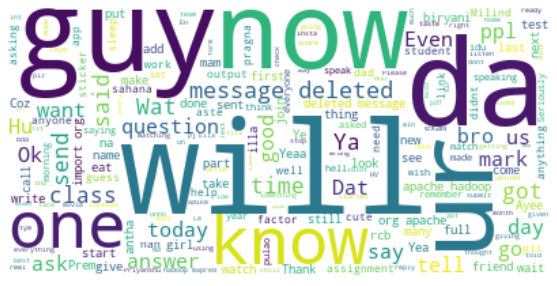

In [ ]:
# top most words sent by each member of the group 

text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Priyanshu Com Class


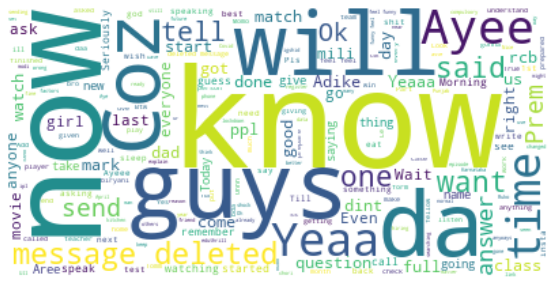

Author name Pragna


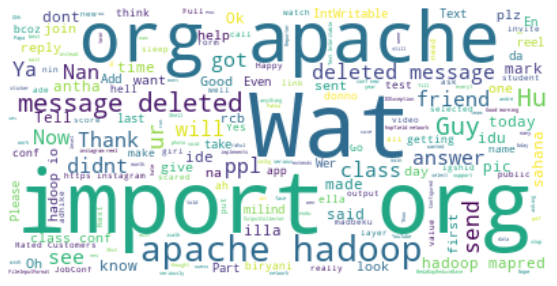

Author name Sahana Gowda


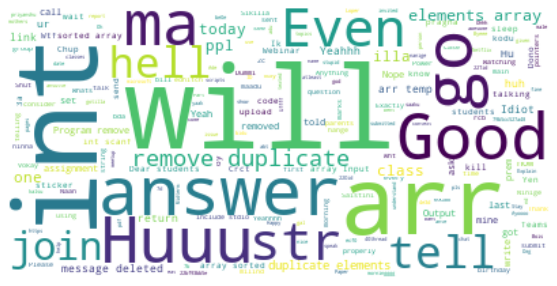

Author name Millan


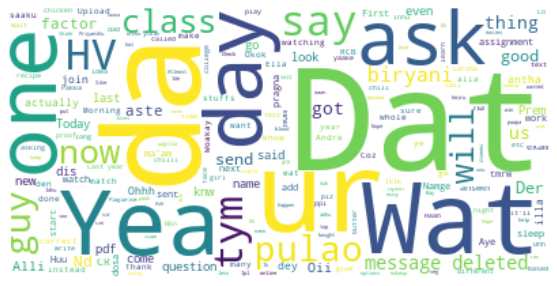

Author name Prem Kumar


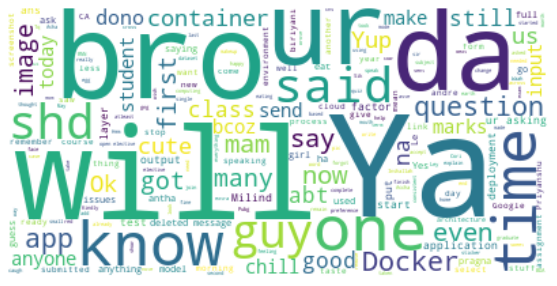

In [ ]:
l = ["Priyanshu Com Class", "Pragna", "Sahana Gowda","Millan","Prem Kumar"]

for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()